In [81]:
library('igraph')
library('Matrix')
library('pracma')
library('visNetwork')

In [3]:
g<-read_graph('facebook_combined.txt', directed=F)

[1] TRUE

[1] 4039

[1] 8

[1] 43.69101

Warning message in xy.coords(x, y, xlabel, ylabel, log):
"819 y values <= 0 omitted from logarithmic plot"

log(degs_outlier) 
        -1.655832

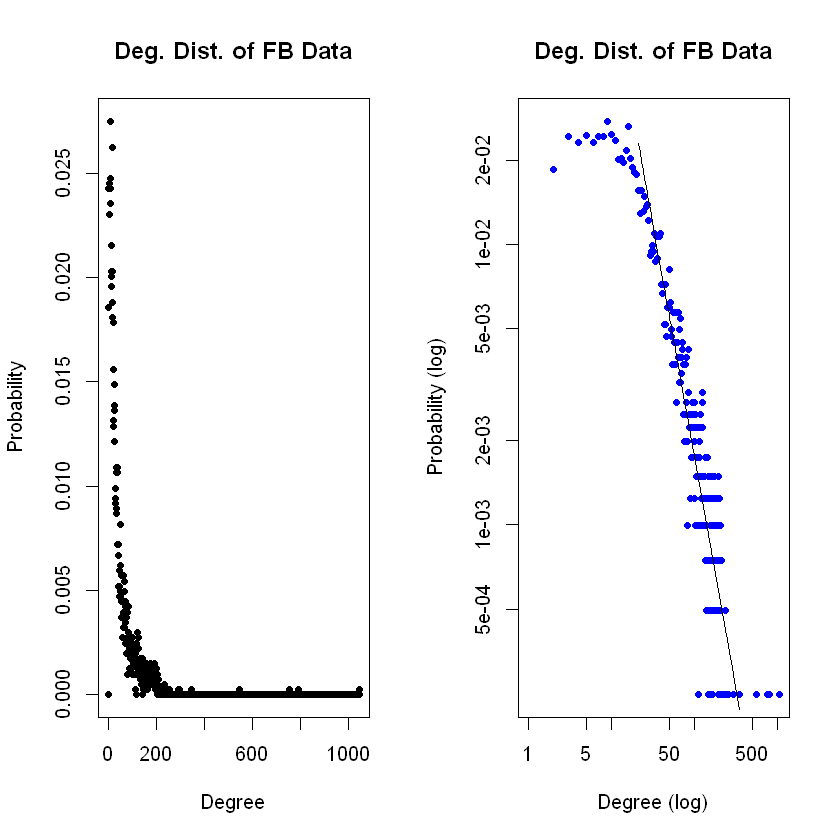

In [77]:
is.connected(g)
vcount(g)
diameter(g)
d<-degree(g)
mean(d)

par(mfrow=c(1,2)) #formatting

dist<-degree.distribution(g)
plot(dist,xlab='Degree',ylab='Probability',main='Deg. Dist. of FB Data',cex=0.8,pch=16)

degs<-which(dist!=0)
degs_outlier<-degs[log(degs)>3 & log(degs)< 6] # removes some outliers for the fit
fit<-lm(log(dist[degs_outlier]) ~ log(degs_outlier))
yfit<-fit$fitted.values
plot(dist,log='xy',xlab='Degree (log)',ylab='Probability (log)',main='Deg. Dist. of FB Data',cex=0.8,pch=16,col='blue')
lines(degs_outlier, exp(yfit))
degs<-seq(1,length(dist))

fit$coefficients[2] # contains the slope

To answer the questions: 
1. The Facebook graph is connected. As such, the GCC is the whole graph, which contains all 4039 nodes in it. 
2. The diameter of the network is 8. 
3. The average degree of the network is 43.7. 
4. Here, the slope of the log-log plot for the degree distribution is approximately -1.66, which means that the power coefficient is not in the range where the distribution is heavy-tailed. 

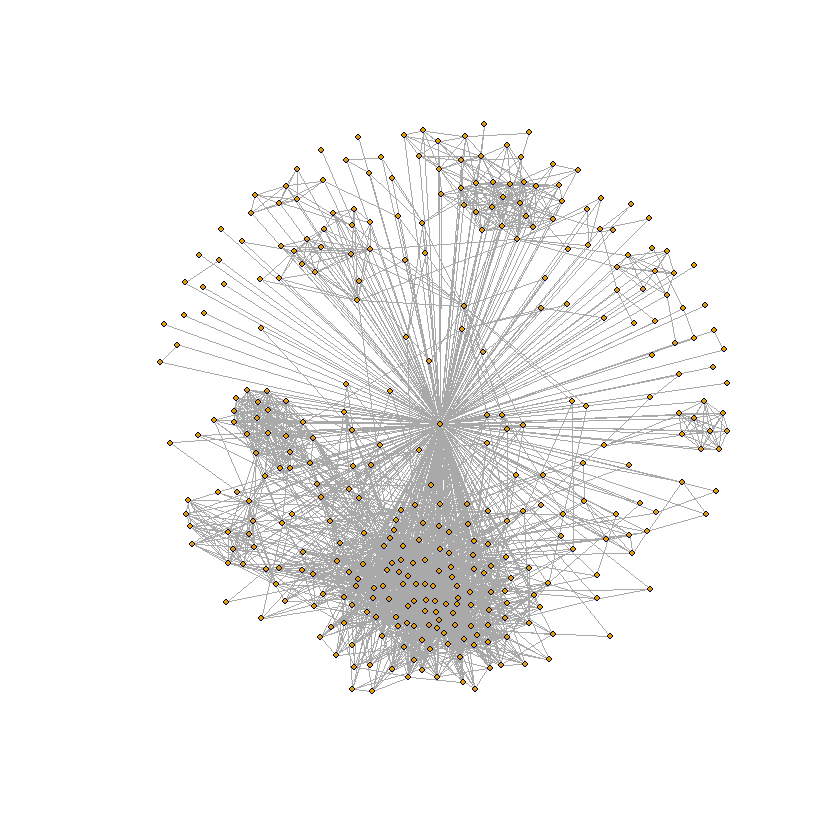

In [100]:
n <- 1 # node we are interested in. 
m <- seq(1,vcount(g))
m <- m[!(m == n |m %in% neighbors(g,n))] # gets all vertices that are not in the network. 
V(g)$vid <- seq(1,vcount(g))
g1 <- delete.vertices(g, m)
plot(g1, vertex.label=V(g1)$vid, vertex.size=2,vertex.label.cex=0.1)

In [102]:
vcount(g1)
ecount(g1)
diameter(g1)

[1] 348

[1] 2866

[1] 2

5. Here, there are 348 nodes and 2866 edges. 
6. The diameter of the network is 2. The minimum for the diameter of the network is 1. The maximum for the diameter is 2. This is because there will always be a path of length 2 between any two nodes - through the center of the individual 